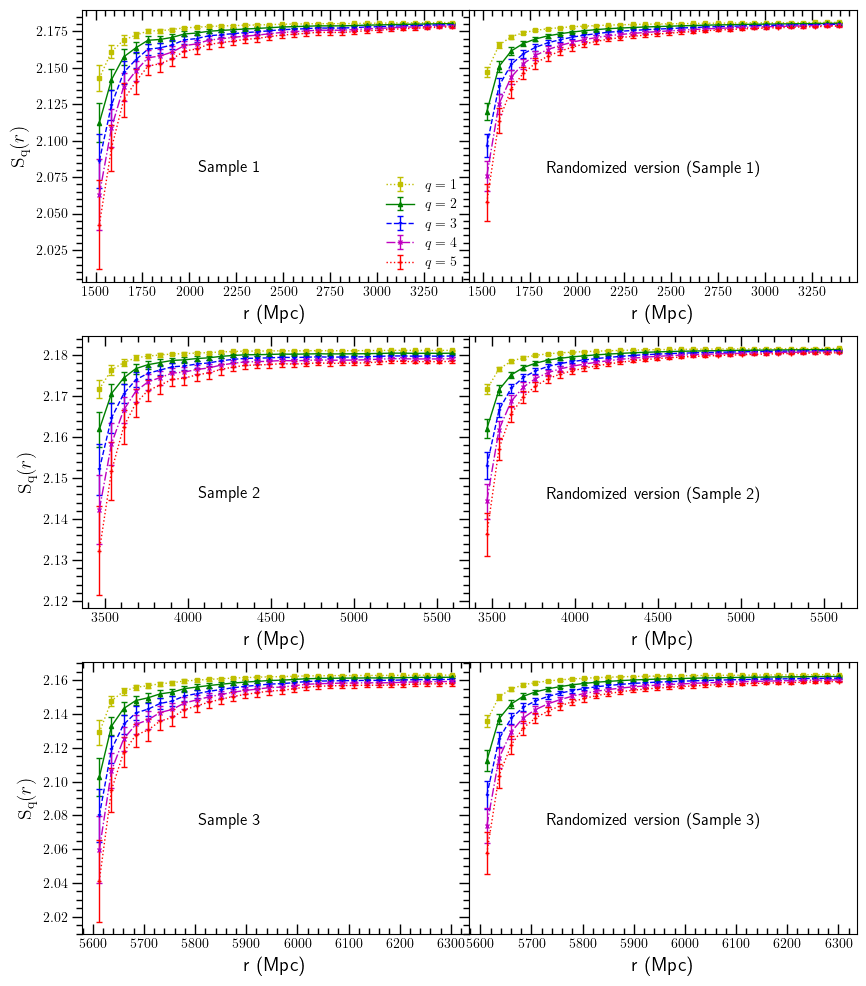

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
plt.rcParams['text.usetex'] = True

# Create a 3x2 grid with shared y-axis and no spacing between columns
fig, axes = plt.subplots(3, 2, figsize=(10, 12), gridspec_kw={'wspace': 0, 'hspace': 0.2}, sharey='row')

for n in range(3):
    # Load actual data
    f_name1 = f'sample{n+1}_entr_err.csv'
    df = pd.read_csv(f_name1)
    r_data = df['r'].to_numpy()
    s = [df[f'a{i}'].to_numpy() for i in range(1, 6)]
    ds = [df[f'std_a{i}'].to_numpy() for i in range(1, 6)]

    # Load randomized data
    f_rand = f'sample_rand_{n+1}_entropy.csv'
    df_rand = pd.read_csv(f_rand)
    r_rand = df_rand['r'].to_numpy()
    mean_rand = [df_rand[f'mean_a{i}'].to_numpy() for i in range(1, 6)]
    std_rand = [df_rand[f'std_a{i}'].to_numpy() for i in range(1, 6)]

    # Define styles and labels
    labels = [r'$q = 1$', r'$q = 2$', r'$q = 3$', r'$q = 4$', r'$q = 5$']
    styles = [(':', 's', 'y'), ('-', '^', 'g'), ('--', '1', 'b'), ('-.', 'x', 'm'), (':', '+', 'r')]

    # Left panel: actual data
    ax_left = axes[n, 0]
    ax_left.set_xlabel("r (Mpc)", fontsize=14)
    # if n == 1:
    ax_left.set_ylabel(r"$\mathrm{S}_\mathrm{q} (r)$", fontsize=14)
    for i in range(5):
        ls, marker, color = styles[i]
        ax_left.errorbar(r_data, s[i], yerr=ds[i], ls=ls, lw=1, marker=marker, markersize=3,
                         c=color, ecolor=color, elinewidth=1, capsize=2, label=labels[i])
    if n == 0:
        ax_left.legend(fontsize=10, frameon=False)
    ax_left.xaxis.set_minor_locator(AutoMinorLocator())
    ax_left.yaxis.set_minor_locator(AutoMinorLocator())
    ax_left.tick_params(which='both', width=1, labelsize=10)
    ax_left.tick_params(which='major', length=7)
    ax_left.tick_params(which='minor', length=4, color='k')

    ax_left.text(0.3, 0.4, f"Sample {n+1}", transform=ax_left.transAxes, fontsize=12)

    # Right panel: randomized data
    ax_right = axes[n, 1]
    ax_right.set_xlabel("r (Mpc)", fontsize=14)
    for i in range(5):
        ls, marker, color = styles[i]
        ax_right.errorbar(r_rand, mean_rand[i], yerr=std_rand[i], ls=ls, lw=1, marker=marker,
                          markersize=3, c=color, ecolor=color, elinewidth=1, capsize=2, label=labels[i])
    ax_right.xaxis.set_minor_locator(AutoMinorLocator())
    ax_right.yaxis.set_minor_locator(AutoMinorLocator())
    ax_right.tick_params(axis='x', which='both', width=1, labelsize=10)
    ax_right.tick_params(axis='y', which='both', width=1, labelsize=10)
    ax_right.tick_params(axis='x', which='major', length=7)
    ax_right.tick_params(axis='x', which='minor', length=4, color='k')
    ax_right.tick_params(axis='y', which='major', length=7)
    ax_right.tick_params(axis='y', which='minor', length=4)

    
    # ax_right.tick_params(axis='y', left=False, labelleft=False)  # Hide right y-axis
    ax_right.text(0.2, 0.4, f"Randomized version (Sample {n+1})", transform=ax_right.transAxes, fontsize=12)
    for ax in [ax_left, ax_right]:
        ax.tick_params(axis='x', which='both', top=True, labeltop=False, direction='in', width=1, length=7)
        # ax.tick_params(axis='y', which='both', direction='in', width=1, length=7)
        ax.tick_params(which='minor', length=4, color='k') 
    

# Save and display
plt.savefig("../plots/combine_entropy.pdf", bbox_inches='tight')
plt.show()
